In [6]:
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix

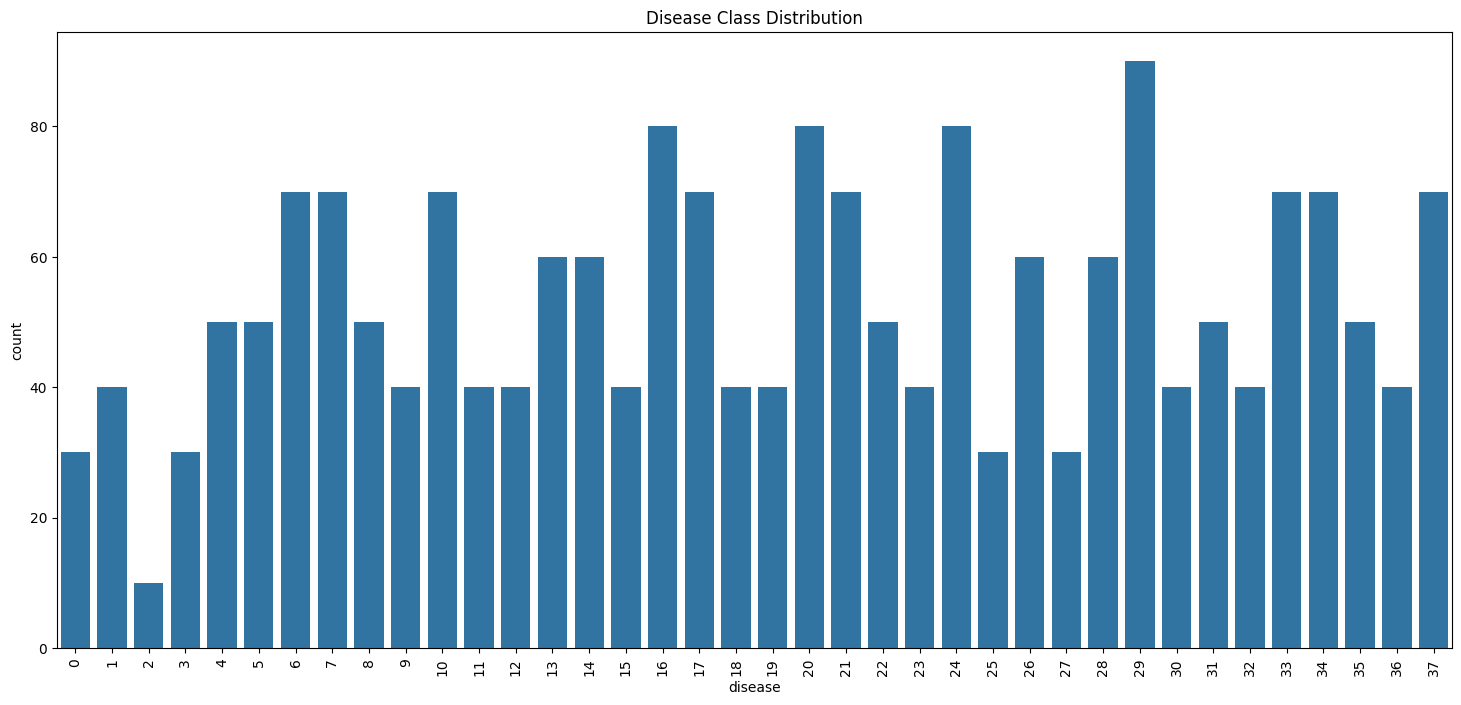

Original Class Distribution:
 disease
29    90
20    80
16    80
24    80
7     70
17    70
34    70
10    70
37    70
6     70
33    70
21    70
26    60
13    60
28    60
14    60
8     50
31    50
35    50
22    50
5     50
4     50
18    40
23    40
1     40
12    40
30    40
32    40
11    40
9     40
36    40
15    40
19    40
27    30
3     30
25    30
0     30
2     10
Name: count, dtype: int64


In [10]:
# Load dataset
data = pd.read_csv('datasets/improved_disease_dataset.csv')

# Encode labels
encoder = LabelEncoder()
data["disease"] = encoder.fit_transform(data["disease"])

# Split features and target
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Plot original class distribution
plt.figure(figsize=(18, 8))
sns.countplot(x=y)
plt.title("Disease Class Distribution")
plt.xticks(rotation=90)
plt.show()

# Show original class distribution numbers
print("Original Class Distribution:\n", pd.Series(y).value_counts())

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Encode gender if present
if 'gender' in X.columns:
    le = LabelEncoder()
    X['gender'] = le.fit_transform(X['gender'])

# Fill missing values
X = X.fillna(0)

# Flatten target if needed
if len(y.shape) > 1:
    y = y.values.ravel()

# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Cross-validation settings
cv_scoring = 'accuracy'  # could also use 'f1_weighted', 'roc_auc_ovr' for multi-class
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Run cross-validation
for model_name, model in models.items():
    try:
        scores = cross_val_score(
            model,
            X,
            y,
            cv=stratified_kfold,
            scoring=cv_scoring,
            n_jobs=-1,
            error_score='raise'
        )
        print("=" * 50)
        print(f"Model: {model_name}")
        print(f"Scores: {scores}")
        print(f"Mean Accuracy: {scores.mean():.4f}")
    except Exception as e:
        print("=" * 50)
        print(f"Model: {model_name} failed with error:")
        print(e)


Model: Decision Tree
Scores: [0.3375 0.3375 0.2875 0.2575 0.3175]
Mean Accuracy: 0.3075
Model: Random Forest
Scores: [0.3575 0.36   0.3075 0.3    0.3525]
Mean Accuracy: 0.3355
